In [ ]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Functional LUME-Astra examples

This is the functional way to run astra and return the evaluate Astra object, or simple dict of outputs

Settings is a list of settings that can appear in the input file.

In [2]:
from astra import run_astra, run_astra_with_generator, template_dir

import matplotlib.pyplot as plt
import os

In [3]:
# Input template file 
ASTRA_IN = os.path.join(template_dir, 'dcgun/astra.in')

In [4]:
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}

# Just run astra
A1 = run_astra(settings0, astra_input_file=ASTRA_IN, verbose=True, timeout=100)

run_astra
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
loading 1 particle files
[100.0]
{'start_time': 1583868857.56196, 'run_script': '/Users/chrisonian/Code/astra/bin/Astra /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpamta_5u4/astra.in', 'why_error': '', 'run_time': 1.5534119606018066, 'run_error': False}


In [5]:
GENERATOR_IN = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
settings0['ipart']= 2000

A2 = run_astra_with_generator(settings0, astra_input_file=ASTRA_IN,
                              generator_input_file=GENERATOR_IN, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
ipart is in generator
set spacecharge mesh for n_particles: 2000 to {'nrad': 10, 'nlong_in': 20}
 --------------------------------------------------------------------------

                              generator              
                             Version 1.0             
                        DESY,  Hamburg 2002          
                        Tue Mar 10 12:34:19 

     Working File is:    /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/t
     Initializing       2000      electrons
     including 6 probe particles at standard positions
     Particles start from a cathode
     Particles are quasi randomly distributed

          Energy spread too high.
                  46 times standard correction procedure



     Final check:
     Particles taken into account      N =       2000
     total charge                      Q =    -0.1000     nC
     h

In [6]:
from distgen.tools import unflatten_dict
unflatten_dict(settings0)

{'zstop': 1, 'zemit': 200, 'zphase': 1, 'phases': True, 'ipart': 2000}

In [7]:
from astra.astra_distgen import run_astra_with_distgen
DISTGEN_IN = os.path.join(template_dir, 'dcgun/distgen.yaml')

# Run Astra with Distgen
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings0['n_particle'] = 2000

A3 = run_astra_with_distgen(settings0, astra_input_file=ASTRA_IN,
                              distgen_input_file=DISTGEN_IN, verbose=True)

run_astra_with_generator
zstop is in astra newrun
zemit is in astra newrun
zphase is in astra newrun
phases is in astra newrun
Replacing param n_particle with value 2000
Distribution format: None
Output file: None

Creating beam distribution....
   Beam starting from: cathode.
   Total charge: 100.000 pC.
   Number of macroparticles: 2000.
   r distribution: radial uniform
      min_r = 0.000 mm, max_r = 0.500 mm
      Assuming cylindrical symmetry...
   t distribution: Gaussian
      avg_t = 0.000 ps, sigma_t = 8.500 ps
      Left n_sigma_cutoff = 3.000, Right n_sigma_cutoff = -3.000
   px distribution: Gaussian
      avg_px = 0.000 eV/c, sigma_px = 357.421 eV/c
   py distribution: Gaussian
      avg_py = 0.000 eV/c, sigma_py = 357.421 eV/c
   pz distribution: Gaussian
      avg_pz = 0.000 eV/c, sigma_pz = 357.421 eV/c
   Scaling sigma_x -> 0.250 mm
   Shifting avg_x -> 0.000 m
   Scaling sigma_y -> 0.250 mm
   Shifting avg_y -> 0.000 m
   Scaling sigma_px -> 357.421 eV/c
   Shifting 

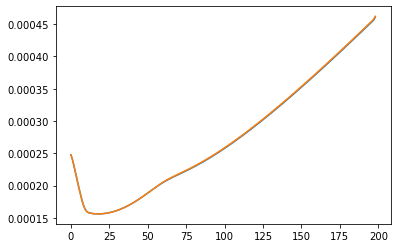

In [8]:
# These Generator and Distgen inputs are set up to produce nearly the same initial beams

plt.plot(A2.stat('sigma_x'))
plt.plot(A3.stat('sigma_x'))

# Evaluate functions

For scans an optimizations, a user often wants to run a simulation many times and examine some particular output. The package provides several `evaluate_` functions that are similar to the `run_` functions above, but apply some merit function to the output and returns that. Additionally, if an `archive_path` is provided, the `.archive` method will be called to save the complete object output

In [9]:
# This is the default merit function that is applied. The user can supply a different function if needed.

from astra.evaluate import default_astra_merit

default_astra_merit(A2)

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_norm_emit_x': 1.7455e-07,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_mean_y': 3.9381999999999995e-08,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_norm_emit_y': 1.7527e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021705,
 'end_sigma_energy': 1.5773,
 'end_norm_emit_z': 0.0034225,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.5767317174233662}

# evaluate_astra_with_generator

In [10]:
# An even simpler run, returns a simple dict of outputs. For use in optimization
from astra import evaluate_astra_with_generator

MY_GENERATOR_TEMPLATE = os.path.join(template_dir, 'dcgun/generator.in')

# Run Astra with Generator
# Run Astra with Generator
settings0 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings0['ipart'] = 2000

outputs1 = evaluate_astra_with_generator(settings0, 
                                        astra_input_file=ASTRA_IN,
                                        generator_input_file=GENERATOR_IN,
                                        archive_path = '.')
outputs1

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_norm_emit_x': 1.7455e-07,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_mean_y': 3.9381999999999995e-08,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_norm_emit_y': 1.7527e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021705,
 'end_sigma_energy': 1.5773,
 'end_norm_emit_z': 0.0034225,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.5767317174233662,
 'fingerprint': 'adb00b9898e26afe34ad389fa47f24f1',
 'archive': '/Users/chrisonian/Code/GitHub/lume-astra/examples/adb00b9898e26afe34ad389fa47f24f1.h5'}

In [11]:
# The archive can be loaded into a clean object.
from astra import Astra
AX = Astra()
AX.load_archive(outputs1['archive'])

# Check the merit
default_astra_merit(AX)

{'error': False,
 'end_cov_x__xp': 2.1221217199999998e-07,
 'end_cov_y__yp': 2.125018715e-07,
 'end_cov_z__energy': 7.868713650000001e-05,
 'end_mean_kinetic_energy': 499790.0,
 'end_mean_t': 4.0153e-09,
 'end_mean_x': 6.1453e-09,
 'end_mean_y': 3.9381999999999995e-08,
 'end_mean_z': 1.0,
 'end_norm_emit_x': 1.7455e-07,
 'end_norm_emit_y': 1.7527e-07,
 'end_norm_emit_z': 0.0034225,
 'end_sigma_energy': 1.5773,
 'end_sigma_x': 0.00046093,
 'end_sigma_xp': 0.00051108,
 'end_sigma_y': 0.00046181,
 'end_sigma_yp': 0.0005110700000000001,
 'end_sigma_z': 0.0021705,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.995e-11,
 'end_higher_order_energy_spread': 1.5767317174233662}

In [12]:
# Cleanup
os.remove(outputs1['archive'])

# evaluate_astra_with_distgen

In [14]:
from astra.evaluate import evaluate_astra_with_distgen

# Run Astra with Distgen
settings5 = {'zstop':1, 'zemit':200, 'zphase':1, 'phases':True}
settings5['n_particle'] = 2000

outputs2 = evaluate_astra_with_distgen(settings5, astra_input_file=ASTRA_IN,
                              distgen_input_file=DISTGEN_IN, archive_path='.')
outputs2

{'error': False,
 'end_mean_z': 1.0,
 'end_mean_t': 4.0156e-09,
 'end_mean_x': -7.6398e-09,
 'end_sigma_x': 0.00046213,
 'end_sigma_xp': 0.00051159,
 'end_norm_emit_x': 1.7519999999999998e-07,
 'end_cov_x__xp': 2.129726105e-07,
 'end_mean_y': -7.1453e-09,
 'end_sigma_y': 0.00046133999999999997,
 'end_sigma_yp': 0.00051148,
 'end_norm_emit_y': 1.7452e-07,
 'end_cov_y__yp': 2.1265928639999998e-07,
 'end_mean_kinetic_energy': 499790.0,
 'end_sigma_z': 0.0021988,
 'end_sigma_energy': 1.5102,
 'end_norm_emit_z': 0.0033203,
 'end_cov_z__energy': 3.677493e-05,
 'end_n_particle_loss': 0,
 'end_total_charge': 9.999999999999999e-11,
 'end_higher_order_energy_spread': 1.51004233649679,
 'fingerprint': 'd6c63a4a61841386012287a8618f2eef',
 'archive': '/Users/chrisonian/Code/GitHub/lume-astra/examples/d6c63a4a61841386012287a8618f2eef.h5'}

In [15]:
# Cleanup
os.remove(outputs2['archive'])
os.remove('NORRAN')

In [16]:
# Compare
for k in outputs1:
    print(k, outputs1[k], outputs2[k])

error False False
end_mean_z 1.0 1.0
end_mean_t 4.0153e-09 4.0156e-09
end_mean_x 6.1453e-09 -7.6398e-09
end_sigma_x 0.00046093 0.00046213
end_sigma_xp 0.00051108 0.00051159
end_norm_emit_x 1.7455e-07 1.7519999999999998e-07
end_cov_x__xp 2.1221217199999998e-07 2.129726105e-07
end_mean_y 3.9381999999999995e-08 -7.1453e-09
end_sigma_y 0.00046181 0.00046133999999999997
end_sigma_yp 0.0005110700000000001 0.00051148
end_norm_emit_y 1.7527e-07 1.7452e-07
end_cov_y__yp 2.125018715e-07 2.1265928639999998e-07
end_mean_kinetic_energy 499790.0 499790.0
end_sigma_z 0.0021705 0.0021988
end_sigma_energy 1.5773 1.5102
end_norm_emit_z 0.0034225 0.0033203
end_cov_z__energy 7.868713650000001e-05 3.677493e-05
end_n_particle_loss 0 0
end_total_charge 9.995e-11 9.999999999999999e-11
end_higher_order_energy_spread 1.5767317174233662 1.51004233649679
fingerprint adb00b9898e26afe34ad389fa47f24f1 d6c63a4a61841386012287a8618f2eef
archive /Users/chrisonian/Code/GitHub/lume-astra/examples/adb00b9898e26afe34ad389fa